In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:\Adhrit_066\Social_Network_Ads.csv')
df.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
x = df[['Age', 'EstimatedSalary']]
x.head()


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
y = df['Purchased']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)


#model = LogisticRegression(random_state = 42)
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report: \n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8625
Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall}")

f1_score = f1_score(y_test, y_pred)
print(f"\nF1-Score: {f1_score}")


Confusion Matrix:
 [[50  2]
 [ 9 19]]

Accuracy: 0.8625

Precision: 0.9047619047619048

Recall: 0.6785714285714286

F1-Score: 0.7755102040816326


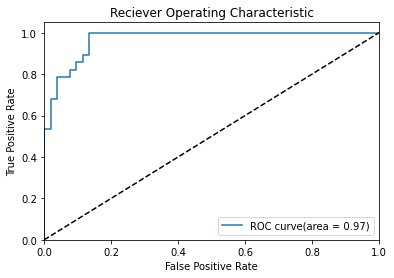

AUROC:  0.9684065934065934


In [9]:
y_pred_proba = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Reciever Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

print("AUROC: ", roc_auc)


In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradient_decent(X, y, epochs=5, lr=0.1):
    m, n=X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        z=np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h-y))//m
        theta-=lr*gradient
        loss=-np.mean(y*np.log(h)+(1-y)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss}")
    return theta

def predict(X, theta):
    z=np.dot(X, theta)
    return np.round(sigmoid(z))

theta = gradient_decent(x_train, y_train)
y_pred_sgd = predict(x_test, theta)
y_pred_sgd = [int(i) for i in y_pred_sgd]


Loss after epoch 1: 0.6931471805599467
Loss after epoch 2: 0.6507247322703736
Loss after epoch 3: 0.6138152717971611
Loss after epoch 4: 0.5821647423183324
Loss after epoch 5: 0.5553951593482833
